# Exercise 4 : Linear Regression

## Objective
In the last Lab Exercise, you have identified and analyzed some of the most relevant numeric variables in this dataset,
which may affect the sale price of a house, and hence, will probably be most relevant in predicting “SalePrice”. In this
Lab Exercise, you will utilize some of those numeric variables to perform Linear Regression and predict “SalePrice”.
Typical steps to follow while building a supervised machine learning model on a given dataset:  



o Partition the labeled dataset into two random portions – 80% to Train the model and 20% to Test the model.  
o Fit the desired supervised machine learning model on the Train set to predict response using the predictors.  
o Predict response using the predictors on the Test set using the machine learning model fit on the Train data.  
o Check the Goodness of Fit of the model on Train set using R^2 and Prediction Accuracy on Test set using MSE.

---

### Preparation and Libraries Import
Import numpy, pandas, seaborn, matplotlib.

In [600]:
import numpy as np;
import pandas as pd;
import seaborn as sb
import matplotlib.pyplot as plt #we only need pyplot
sb.set() #Set the default seaborn style for graphics.

#### Linear Regression using Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
Import the `LinearRegression` model from `sklearn.linear_model`.

In [601]:
# Import essential models and functions from sk learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [602]:
#Import the train data set
trainData = pd.read_csv("train.csv")
trainData.head(n = 10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [603]:
print("Data type : ", type(trainData))
print("Data dims : ", trainData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1460, 81)


In [604]:
print(trainData.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [605]:
trainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Problem 1 : Predicting SalePrice using GrLivArea

---

Note : We observed during EDA that GrLivArea and SalePrice have a strong linear relationship with correlation 0.71.
In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy.

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train
set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.  

## Import the Dataset


In [606]:
#Import the relevant data sets
#We are predicting SalePrice using GrLivArea
grLivArea = pd.DataFrame(trainData["GrLivArea"]) #Predictor
salePrice = pd.DataFrame(trainData["SalePrice"]) #Response

#Split the Dataset into Train and Test
grLivArea_train, grLivArea_test, salePrice_train, salePrice_test = train_test_split(grLivArea,salePrice, test_size = 0.20)

### Basic Exploration

In [607]:
grLivArea_train.describe()

,GrLivArea
count,1168.000000
mean,1521.243151
std,526.833994
min,334.000000
25%,1135.750000
50%,1466.000000
75%,1786.000000
max,5642.000000


In [608]:
salePrice_train.describe()

,SalePrice
count,1168.000000
mean,180317.647260
std,79682.286397
min,34900.000000
25%,129900.000000
50%,162000.000000
75%,210500.000000
max,755000.000000


<AxesSubplot:>

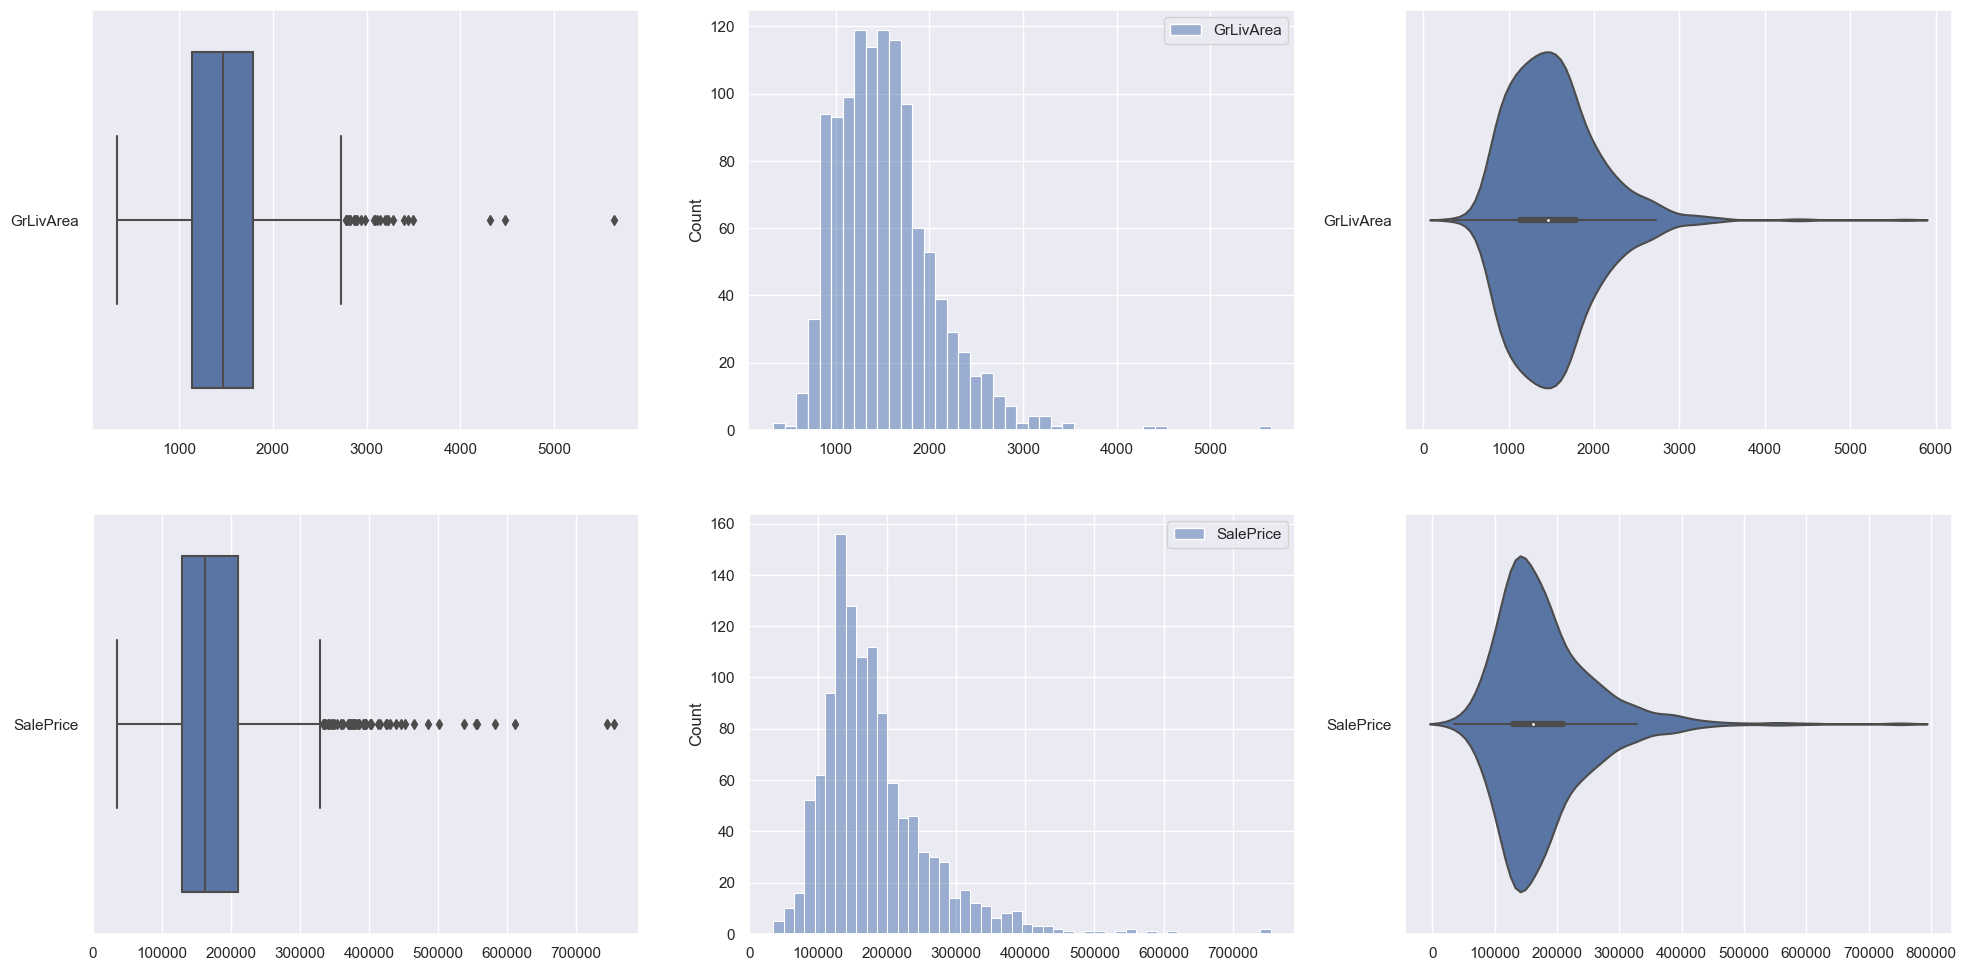

In [609]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(data = grLivArea_train, orient = "h", ax = axes[0,0])
sb.histplot(data = grLivArea_train, ax = axes[0,1])
sb.violinplot(data = grLivArea_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(data = salePrice_train, orient = "h", ax = axes[1,0])
sb.histplot(data = salePrice_train, ax = axes[1,1])
sb.violinplot(data = salePrice_train, orient = "h", ax = axes[1,2])

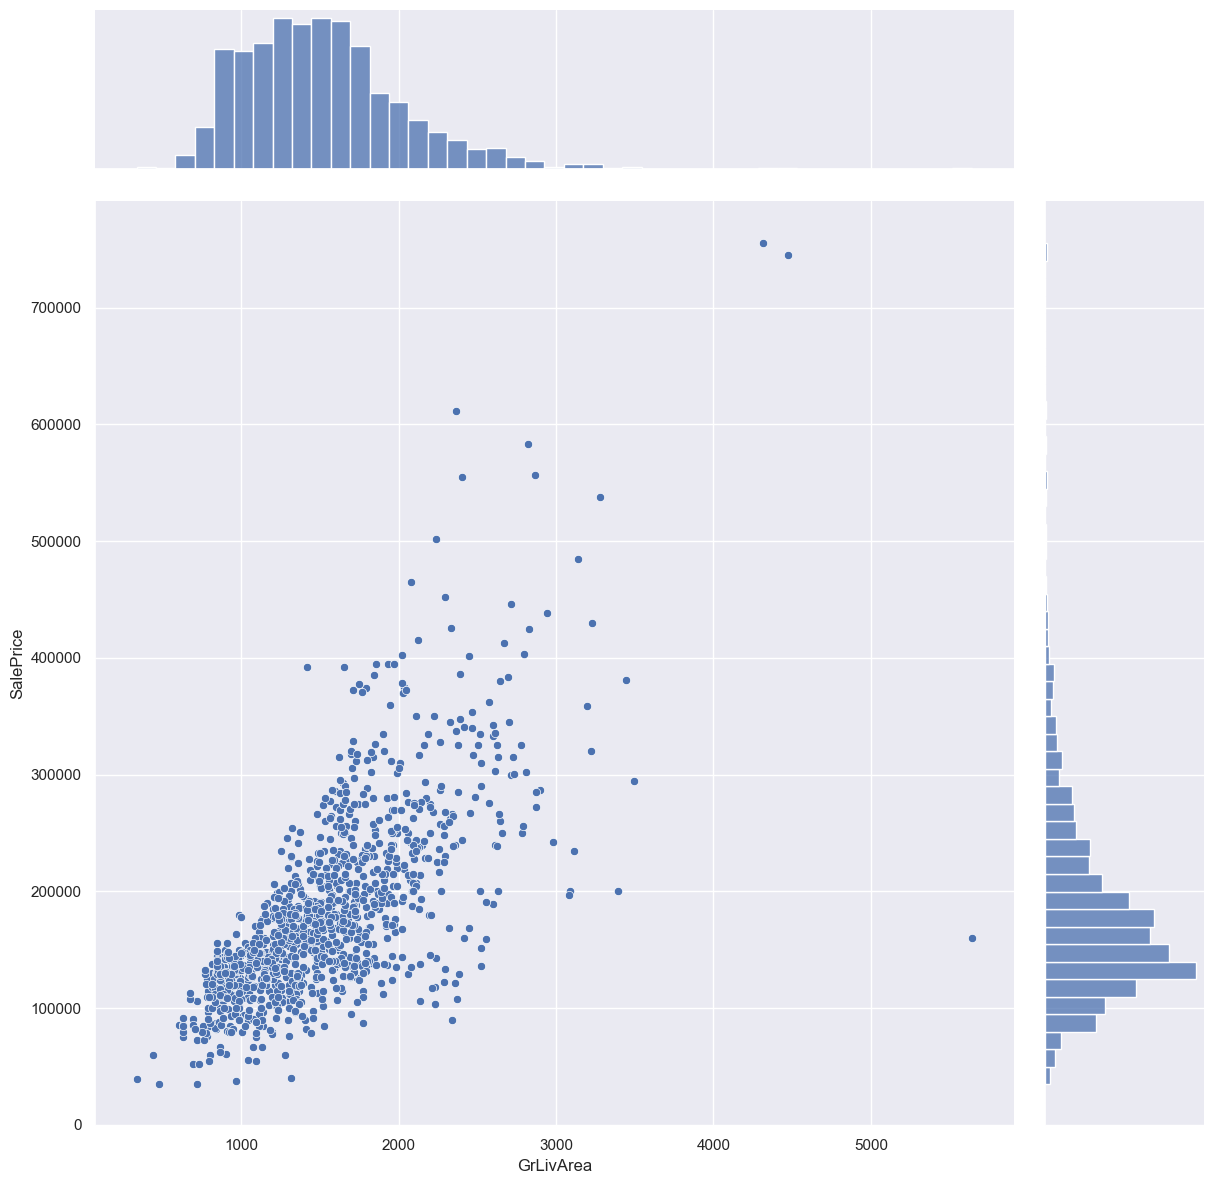

In [610]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([grLivArea_train, salePrice_train], axis = 1).reindex(salePrice_train.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = trainDF, x = "GrLivArea", y = "SalePrice", height = 12)

<AxesSubplot:>

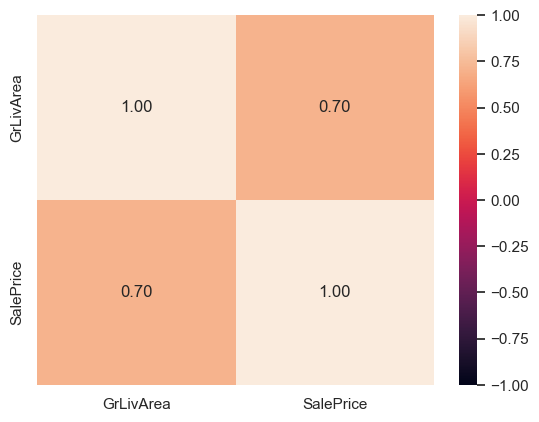

In [611]:
# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

So far, the results are about the same as from last week when conducting our EDA this week. Let us plot the regression line now.

Intercept 	: b =  [18400.91302032]
Coefficients 	: a =  [[106.43711636]]


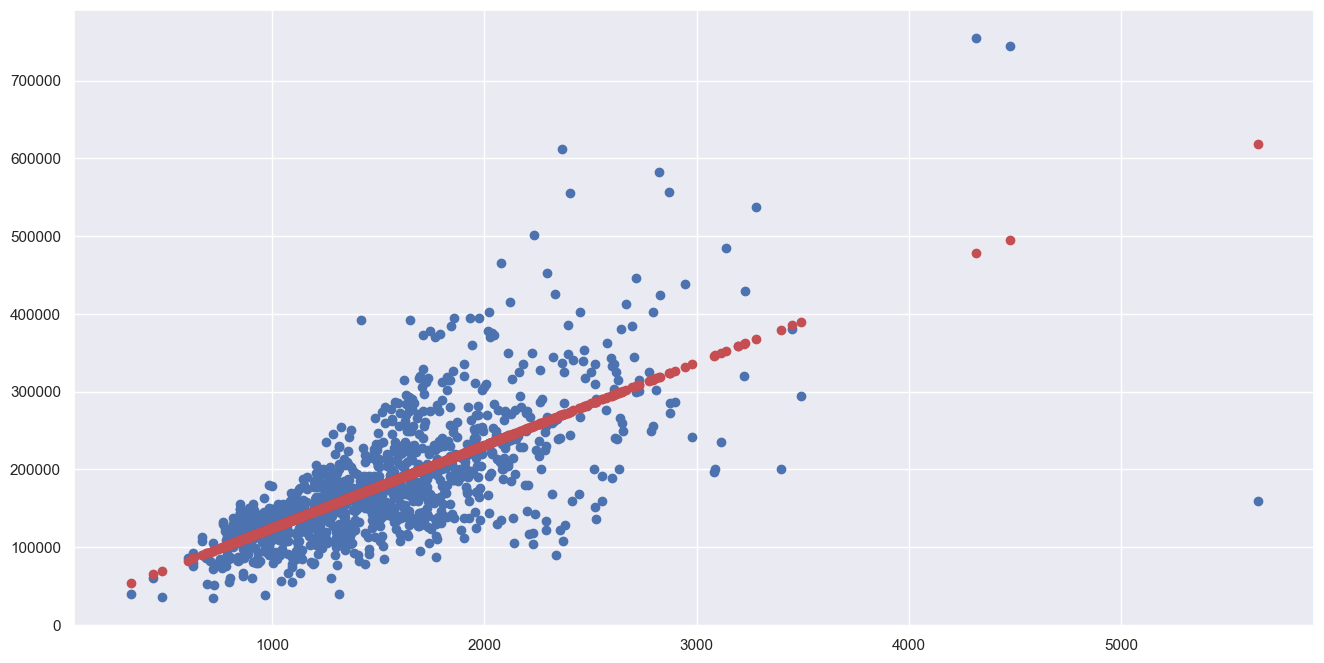

In [612]:
#Create a Linear Regression object
linreg = LinearRegression()
#Train the Linear Regression model
linreg.fit(grLivArea_train, salePrice_train)

#Coefficients of the Linear Regression line
print("Intercept \t: b = ", linreg.intercept_)
print("Coefficients \t: a = ",linreg.coef_)

#Attempt to predict SalePrice using GrLivArea
salePrice_train_pred = linreg.predict(grLivArea_train)
#Predict The SalePrice corresponding to the GrLivAreaTest
salePrice_test_pred = linreg.predict(grLivArea_test)

#Plot the Linear Regression Line
f = plt.figure(figsize = (16,8))
#Scatter plot between our train values
plt.scatter(grLivArea_train, salePrice_train)
#Then plot the line on where we predicted the sale price to be using grlivarea
#Then do another scatter plot of train and the predicted price on y axis
plt.scatter(grLivArea_train, salePrice_train_pred, color = "r")
plt.show()

### Linear Regression Plot with a solid line:

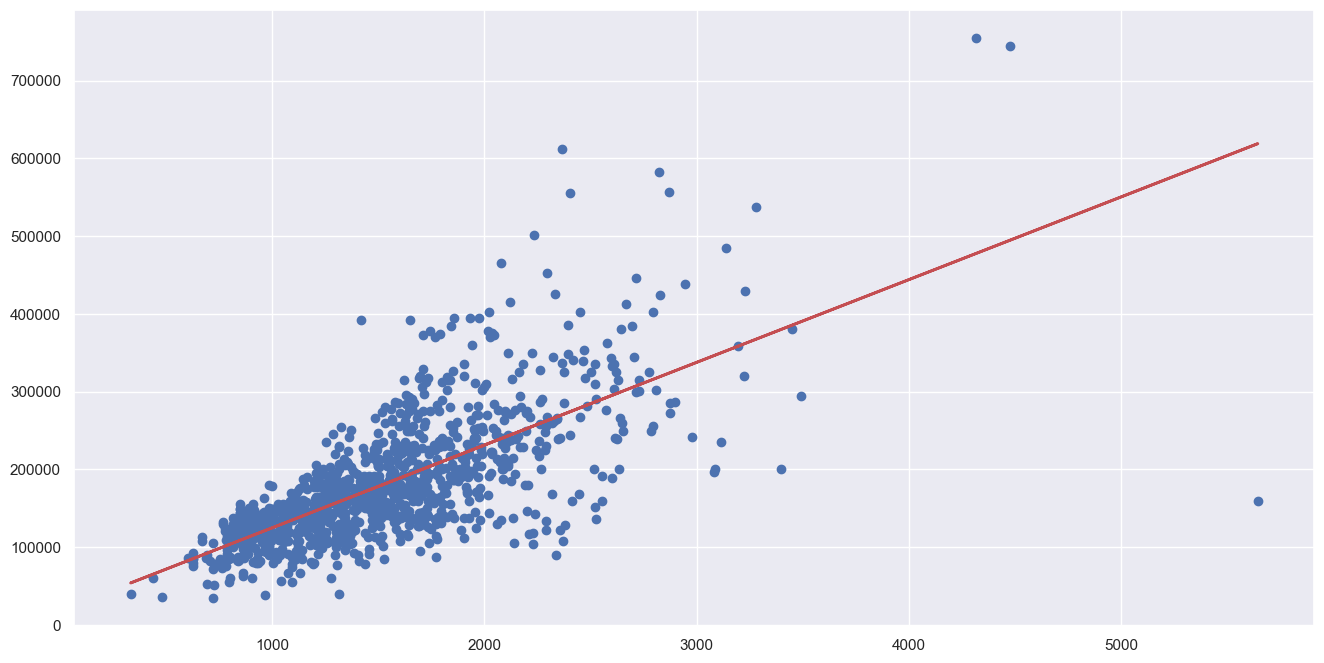

In [613]:
f = plt.figure(figsize = (16,8))
#Scatter plot between our train values
plt.scatter(grLivArea_train, salePrice_train)
#Then plot the line on where we predicted the sale price to be using grlivarea
plt.plot(grLivArea_train,salePrice_train_pred, 'r-', linewidth = 2)

b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

We can test the Goodness of Fit of the model using Explained Variance and Mean Squared Error.

Test the Linear Regression model `linreg` using the Test Set.   

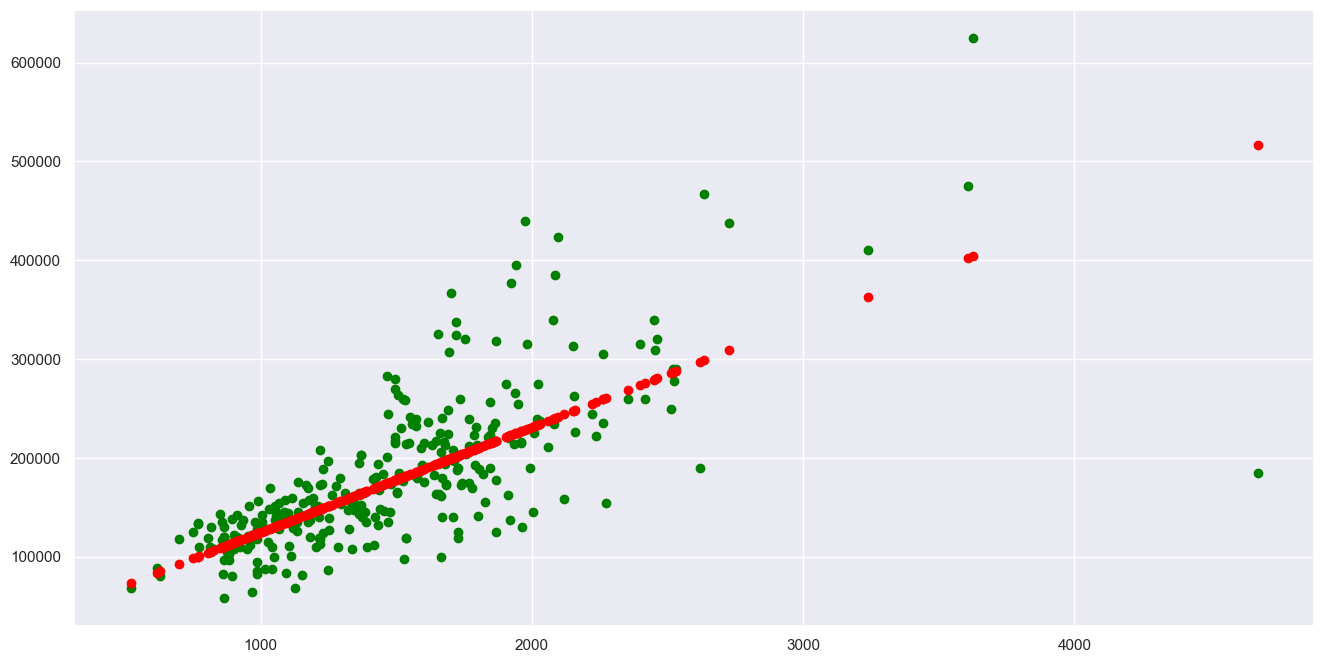

In [614]:
#Plot the # Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(grLivArea_test, salePrice_test, color = "green")
plt.scatter(grLivArea_test, salePrice_test_pred, color = "red")
plt.show()

Check how good the predictions are on the Test Set.    
Metrics : Explained Variance and Mean Squared Error.

To check Goodness of Fit of the model on the Train Set, we will use Explained Variance  
To check Prediction Accuracy on the Test Set, we can use Mean Squared Error(MSE) and Root Mean Squared Error(RMSE)

In [615]:
#Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean SQuared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

#Check Goodness of Fit on Train Data using Explained Variance and MSE
print("Goodness of Fit of Model") #\t[{0},{1}]".format("GrLivArea_Test", "SalePrice_Test"))
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(grLivArea_train, salePrice_train))

#Calculate MSE and print
mse = mean_squared_error(salePrice_test,salePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))


Goodness of Fit of Model
Explained Variance (R^2) 	: 0.49523371784343195
Mean Squared Error (MSE) 	: 2898697775.0458198
Root Mean Squared Error (RMSE) 	: 53839.555858549014


--- 

## Problem 2 : Predicting SalePrice using Other Variables

Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice
using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.


Hints and Pointers  
o Same as Problem 1, just on other variables. You can compare models using the metrics you are printing anyway.  
o Optional: You may think of writing a simple Python function to do regression on some variables in a given dataset.

[GarageArea,SalePrice] Data:
Intercept 	: b =  [68704.43975425]
Coefficients 	: a =  [[237.77897104]]

[TotalBsmtSF,SalePrice] Data:
Intercept 	: b =  [64161.93382015]
Coefficients 	: a =  [[111.06743303]]



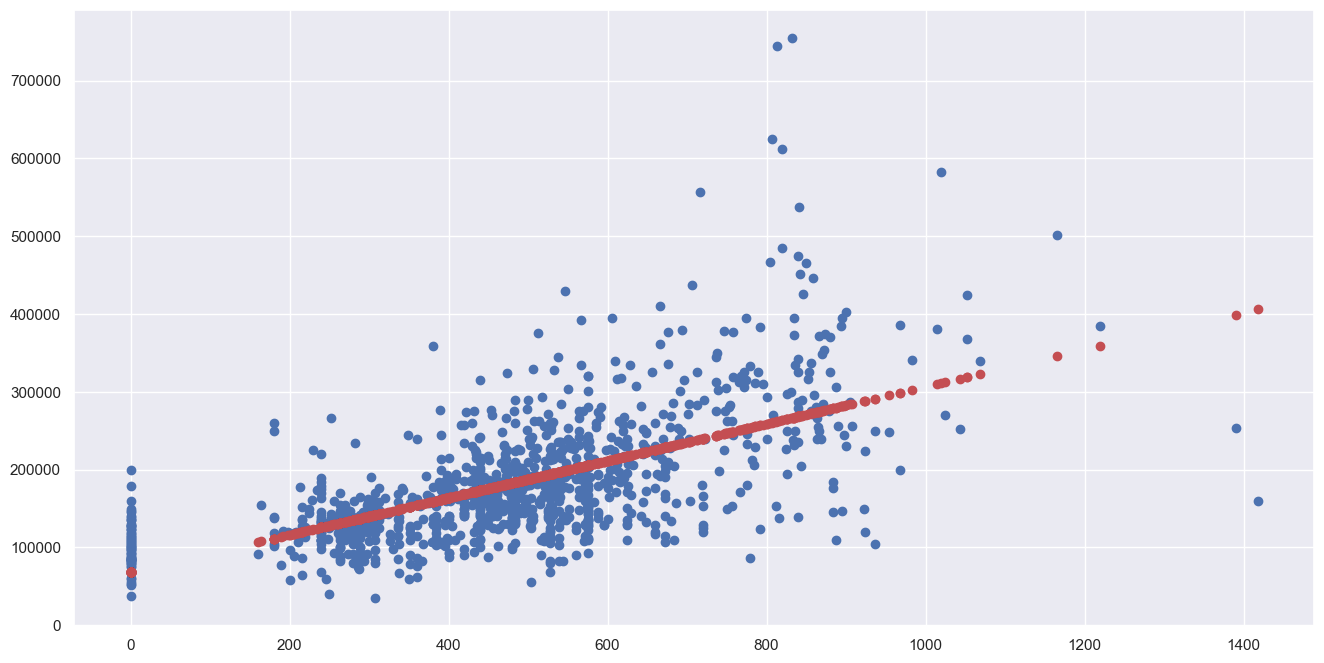

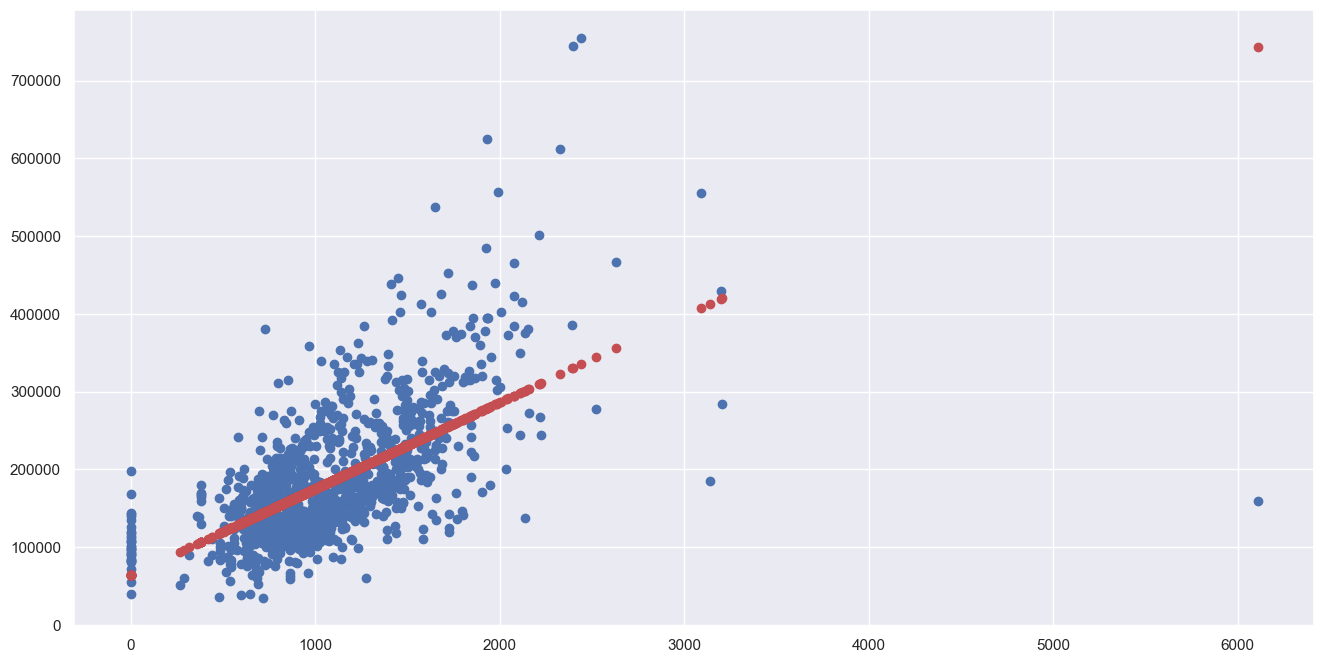

In [616]:
#Define a regression func to easily calculate regression among two variables
def calcRegression(predictor, response, testSize = 0.2, solidLine = False):

    #Get the appropriate data from train and put them in DF!
    #Check if the inputs are valid
    try:
        predictorDF = pd.DataFrame(trainData[predictor])
        responseDF = pd.DataFrame(trainData[response])
    except KeyError as e:
         print("The inputs ({0},{1}), to calculate regression are invalid!".format(predictor,response))
         return
     
    #Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictorDF,responseDF, test_size = testSize)

    #Then calculate the linear regression using train data
    linreg = LinearRegression();
    linreg.fit(X_train, y_train);

    #Print Coefficients of the Linear Regression line
    print("[{0},{1}] Data:".format(predictor, response))
    print("Intercept \t: b = ", linreg.intercept_)
    print("Coefficients \t: a = ",linreg.coef_)

    #Predict the values corresponding to the predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    #Plot the regression line
    f = plt.figure(figsize = (16,8))
    plt.scatter(X_train, y_train)
    if solidLine:
        plt.plot(X_train,y_train_pred,'r-', linewidth = 2)
    else:
        plt.scatter(X_train, y_train_pred, color = "r")
    print()

    #Then return a tuple of the predictions
    return (y_test, y_train_pred, y_test_pred)


garageAreaPricePred = calcRegression("GarageArea", "SalePrice")
totalBsmtSFPricePred = calcRegression("TotalBsmtSF", "SalePrice")

### Define a Goodness of Fit Function

In [617]:
#Will pass in the tuple of the data we used to calculate our regression to maintain consitency
#(y_test, y_train_pred, y_test_pred)
# [0] y_test
# [1], y_train_pred
# [2], y_test_pred

def goodnessOfFit(data):
    mse = mean_squared_error(data[0], data[2])
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
    print("")
    

#Comparison of all three models
print("GrLivArea <-> SalePrice")
goodnessOfFit((salePrice_test, salePrice_train_pred, salePrice_test_pred))
print("GarageArea <-> SalePrice")
goodnessOfFit(garageAreaPricePred)
print("GrLivArea <-> SalePrice")
goodnessOfFit(totalBsmtSFPricePred)


GrLivArea <-> SalePrice
Mean Squared Error (MSE) 	: 2898697775.0458198
Root Mean Squared Error (RMSE) 	: 53839.555858549014

GarageArea <-> SalePrice
Mean Squared Error (MSE) 	: 3866145753.007816
Root Mean Squared Error (RMSE) 	: 62178.338294037865

GrLivArea <-> SalePrice
Mean Squared Error (MSE) 	: 3097490757.8561845
Root Mean Squared Error (RMSE) 	: 55655.105406927265



# Insert Conclusion <!>

--- 
# Problem 3 : Refining the Models to Predict SalePrice

In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice.  

(a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea
UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

(b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on
the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.


(c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.